# MATH 300 - Tools for Data Science 
# Activity for: Linear Regression 1


## Exercise: amphetamine and appetite

Amphetamine is a drug that suppresses appetite. In a study of this effect, a pharmocologist randomly allocated 24 rats to three treatment groups to receive an injection of amphetamine at one of two dosage levels (2.5 mg/kg or 5.0 mg/kg), or an injection of saline solution (0 mg/kg). She measured the amount of food consumed by each animal (in gm/kg) in the 3-hour period following injection. The results (gm of food consumed per kg of body weight) are shown below.


In [3]:
# imports and setup

import scipy.stats as sc # Changed this slightly so I can access the stats probability plot
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     
from sklearn import linear_model        

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Activity 1: Scatterplot and Linear Regression

**Exercise:** Make a scatter plot with dose as the $x$-variable and food consumption as the $y$ variable. Then run a linear regression on the data using the 'ols' function from the statsmodels python library to relate the variables by 

$$
\text{Food Consumption} = \beta_0 + \beta_1 \text{Dose}. 
$$

What is the resulting linear equation? What is the $R^2$ value? Do you think the variables have a strong linear relationship? Add the line to your scatter plot.


In [25]:
# Create DataFrame using pandas
rat_data = {
    "Dose": ["0 mg/kg"] * len(food_consump_dose0) +
            ["2.5 mg/kg"] * len(food_consump_dose2p5) +
            ["5.0 mg/kg"] * len(food_consump_dose5),
    "Dose_numeric": [0] * len(food_consump_dose0) + [2.5] * len(food_consump_dose2p5) + [5.0] * len(food_consump_dose5),
    "Food_Consumption": food_consump_dose0 + food_consump_dose2p5 + food_consump_dose5
}

df = pd.DataFrame(rat_data)
df


,Dose,Dose_numeric,Food_Consumption
0,0 mg/kg,0.0,112.6
1,0 mg/kg,0.0,102.1
2,0 mg/kg,0.0,90.2
3,0 mg/kg,0.0,81.5
4,0 mg/kg,0.0,105.6
5,0 mg/kg,0.0,93.0
6,0 mg/kg,0.0,106.6
7,0 mg/kg,0.0,108.3
8,2.5 mg/kg,2.5,73.3
9,2.5 mg/kg,2.5,84.8


In [27]:
# Create a mask for each type of dose
dose_0 = df[df["Dose_numeric"] == 0]
dose_2p5 = df[df["Dose_numeric"] == 2.5]
dose_5 = df[df["Dose_numeric"] == 5.0]
dose_5 # Print this out just as a test (should just show rows 16-23)

,Dose,Dose_numeric,Food_Consumption
16,5.0 mg/kg,5.0,38.5
17,5.0 mg/kg,5.0,81.3
18,5.0 mg/kg,5.0,57.1
19,5.0 mg/kg,5.0,62.3
20,5.0 mg/kg,5.0,51.5
21,5.0 mg/kg,5.0,48.3
22,5.0 mg/kg,5.0,42.7
23,5.0 mg/kg,5.0,57.9


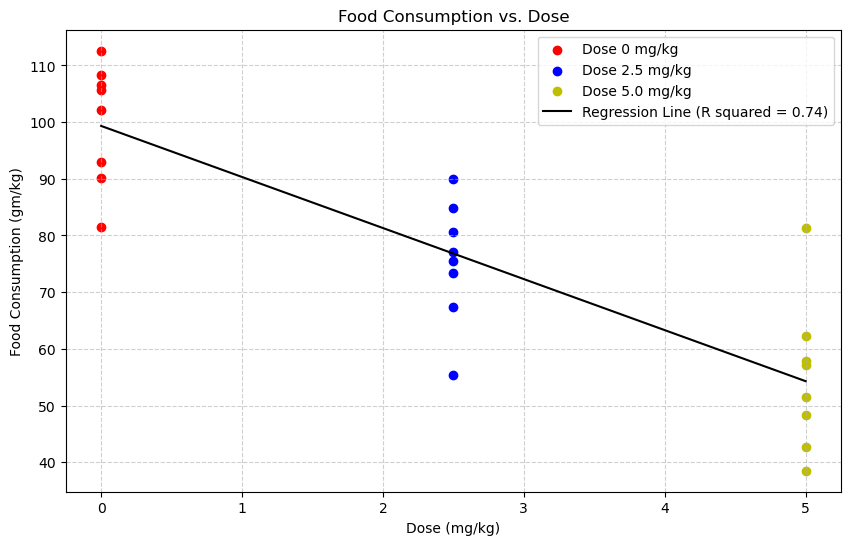

In [7]:
# Create a scatter plot (food cons. ~ dose) using masked data frames
plt.scatter(x=dose_0["Dose_numeric"], y=dose_0["Food_Consumption"], c='r', label='Dose 0 mg/kg')
plt.scatter(x=dose_2p5["Dose_numeric"], y=dose_2p5["Food_Consumption"], c='b', label='Dose 2.5 mg/kg')
plt.scatter(x=dose_5["Dose_numeric"], y=dose_5["Food_Consumption"], c='y', label='Dose 5.0 mg/kg')

# Labels and legend
plt.xlabel('Dose (mg/kg)')
plt.ylabel('Food Consumption (gm/kg)')
plt.legend(loc='best') # Chooses the best location for me, testing this out to get familiar with other tools and options!
plt.title("Food Consumption vs. Dose")
plt.grid(True, linestyle="--", alpha=0.6)

# Next, we are going to build our regression model 
regression_model = sm.ols('Food_Consumption ~ Dose_numeric', data = df).fit()

# Extract regression coefficients from model
beta_0 = regression_model.params['Intercept']
beta_1 = regression_model.params['Dose_numeric']
r_squared = regression_model.rsquared

# Add model to plot
x_vals = np.linspace(0, 5, 100)
y_vals = beta_0 + beta_1 * x_vals
plt.plot(x_vals, y_vals, color = 'black', linestyle = '-', label = f'Regression Line (R squared = {r_squared:.2f})')

# Show plot
plt.legend()
plt.show()


**Question: What is the resulting linear equation? What is the $R^2$ value? Do you think the variables have a strong linear relationship?**

Ans: I'll code the linear equation below this as well as the value of $R^2$. 

In [9]:
# View ols regression results
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Food_Consumption   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           7.27e-08
Time:                        17:03:42   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       99.3312      3.680     26.994      0.000      91.700     106.963
Dose_numeric    -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above, we see that the f-statistic probability is very much smaller than a = 0.05. Thus, we can conclude that the predictions from this model are statistically significant. Let's now check the correlations of each variable. 

                  Dose_numeric  Food_Consumption
Dose_numeric          1.000000         -0.859873
Food_Consumption     -0.859873          1.000000


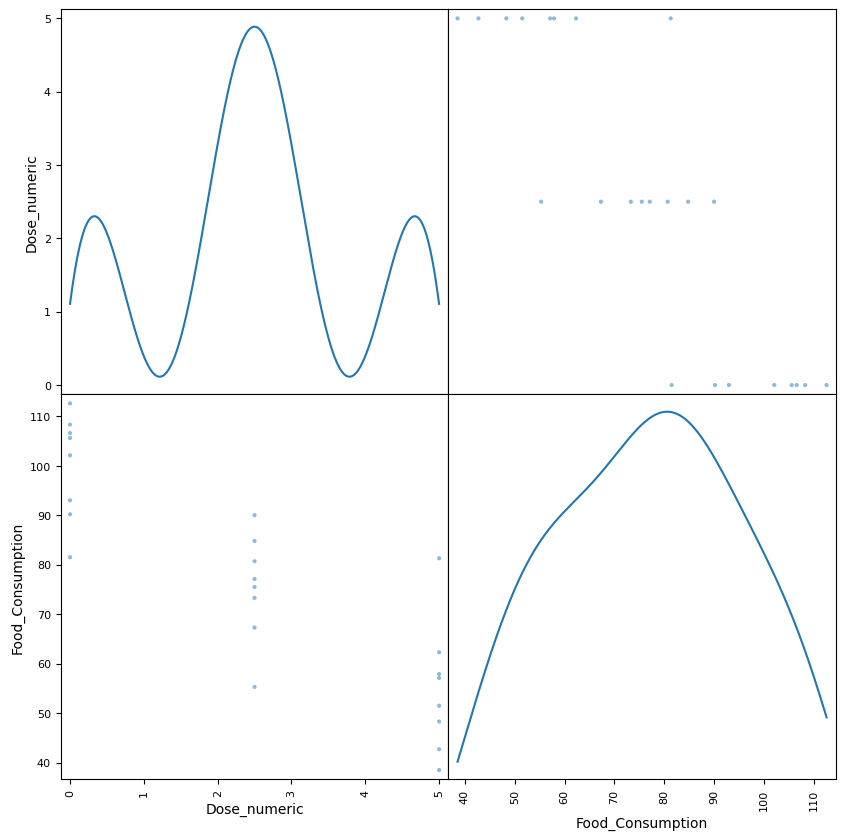

In [11]:
print(df.drop(columns=["Dose"]).corr())
pd.plotting.scatter_matrix(df, figsize = (10, 10), diagonal = 'kde')
plt.show()

From this we see that dose and food consumption do in fact have a high correlation of -0.86!

In [13]:
# Print linear equation
print(f'The equation for this model is Y = {beta_0:.2f} + {beta_1:.2f}X. This means for every additional mg of amphetamine, we predict food consumption to decrease by roughly 9 gm/kg in the following 3 hours per rat.')
print(f'The intercept, {beta_0:.2f}, represents the base food consumption of a rat injected with saline solution.')


# Print R squared value
print(f'\nThe R squared value for this model is {r_squared:.2f}, which is pretty good! This means that this model accounts for roughly 74% of the variance in this data set.')

The equation for this model is Y = 99.33 + -9.01X. This means for every additional mg of amphetamine, we predict food consumption to decrease by roughly 9 gm/kg in the following 3 hours per rat.
The intercept, 99.33, represents the base food consumption of a rat injected with saline solution.

The R squared value for this model is 0.74, which is pretty good! This means that this model accounts for roughly 74% of the variance in this data set.


## Activity 2: Residuals

The regression in Activity 1 is in fact valid even though the predictor $x$ only has 3 distinct values; for each fixed value of $x$, the researcher collected a random sample of $y$ values.

However, one assumption which is made by simple linear regression is that the residuals have an approximately normal distribution.

**Exercise:** Compute the residuals for the above regression and make a normal probability plot of the residuals. Do you think they are approximately normally distributed? 



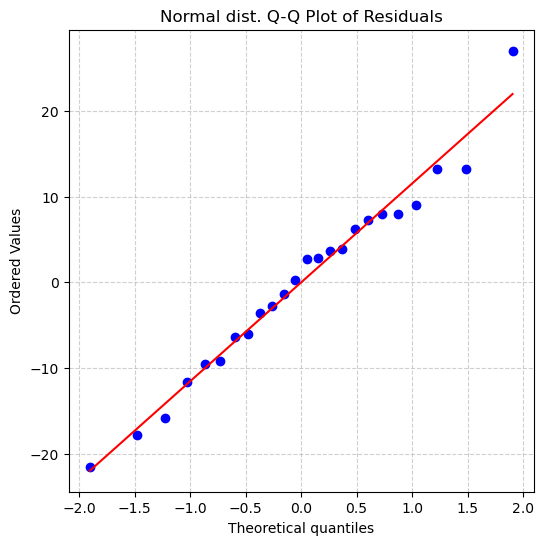

In [15]:
# Compute predicted values using the regression model
df["Predicted_Food_Consumption"] = regression_model.predict(df["Dose_numeric"])

# Compute residuals using formula
df["Residuals"] = df["Food_Consumption"] - df["Predicted_Food_Consumption"]

# Create a Normal Q-Q Plot
fig, ax = plt.subplots(figsize=(6, 6))
sc.probplot(df["Residuals"], dist="norm", plot=ax)
plt.title("Normal dist. Q-Q Plot of Residuals")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Based on this QQ plot I would consider the residuals to be very closely resemble a normal distribution. 
